In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

## DETENCIÓN ANTICIPADA ##

Consiste en detener el entrenamiento tan pronto como el error de validación alcance un mínimo.

In [2]:
data = pd.read_csv("DataSets/velocidad.csv", index_col = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       100 non-null    float64
 1   v       100 non-null    float64
dtypes: float64(2)
memory usage: 2.3 KB


In [3]:
x = np.array(data[["t"]])
y = np.array(data[["v"]])

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(tol = 1e-3, early_stopping = True, validation_fraction = 0.1, n_iter_no_change = 10) #Descenso de gradiente
reg.fit(x_train, y_train)

/home/EhwazM/VirtualEnvs/Python/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(early_stopping=True, n_iter_no_change=10)

In [4]:
print(f'El Bias es: {float(reg.intercept_)}, mientras que el peso de t es: {float(reg.coef_)}')

El Bias es: 3.4800987739741736, mientras que el peso de t es: 3.472776783618138


/tmp/ipykernel_74166/3455327820.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'El Bias es: {float(reg.intercept_)}, mientras que el peso de t es: {float(reg.coef_)}')


In [5]:
y_pred_r = reg.predict(x_test)
r2_score(y_test, y_pred_r)

0.8330127576601218

In [7]:
#Usando el descenso de gradiente con lote y la detención anticipada

from physics.RegressionModel import DGRegression

reg = DGRegression()

reg.fit(x_train, y_train)
print("Intercepto y coeficiente: ", reg.intercept, reg.coef)
print("\n Valor de R^2: ", r2_score(y_test, y_pred_r))

y_pred = reg.predict(x_test)

Se detuvo por convergencia en iteración 156
Intercepto y coeficiente:  [3.13960594] [[3.33237993]]

 Valor de R^2:  0.8330127576601218


In [11]:
data = pd.read_csv("DataSets/aceleracion.csv", index_col = 0)
data.head(5)

,frecuencia,aceleración
0,0.195754,1.069922
1,0.205205,1.067387
2,0.442752,1.368138
3,0.250229,1.103748
4,0.026886,0.996347


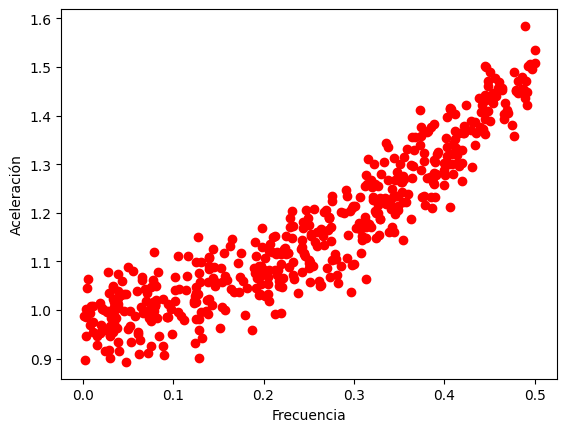

In [12]:
plt.scatter(data["frecuencia"], data["aceleración"], color = "red")
plt.xlabel("Frecuencia")
plt.ylabel("Aceleración")
plt.show()

In [13]:
x = np.array(data[["frecuencia"]])
y = np.array(data[["aceleración"]])

## Preprocesado de datos ##

Elevar cada uno de los datos a una potencia determinada de tal forma que la predicción general se haga a partir de regresiones lineales

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2) #Eleva los datos a la potencia 2

In [21]:
#Aplicando el método
poly_t= poly.fit_transform(x) #Se transforma x, los valores de entrada. 
print(poly_t)

[[1.         0.19575386 0.03831957]
 [1.         0.20520452 0.0421089 ]
 [1.         0.44275188 0.19602922]
 ...
 [1.         0.06689762 0.00447529]
 [1.         0.49270569 0.2427589 ]
 [1.         0.19755983 0.03902989]]


In [23]:
#Se toman los datos transformados para entrenamiento
x_train, x_test, y_train, y_test = train_test_split(poly_t, y, test_size = 0.2) 

In [25]:
#Se hace un objeto con la clase de Regresión Lineal
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [29]:
lr.intercept_, lr.coef_

(array([0.98246365]), array([[0.        , 0.1412436 , 1.78094036]]))

Al usar polinomios, aumenta el numero de coeficientes asociados a cada potencia, de la siguiente forma:

$$ y = 0.98477098 + 0.11158265x + 1.86456595x^2 $$

In [30]:
x_n = np.linspace(0, 0.5, 100).reshape(100, 1) #Se generan 100 datos entre 0 y 0.5 para ver si el modelo cubre todo el dataset